In [26]:
import pandas as pd
excel_data_df = pd.read_csv('PR_organic.csv')
excel_data_df.head()

,t,yt
0,1,68
1,2,67
2,3,59
3,4,38
4,5,30


In [ ]:
#получение функции для линейного тренда, прогнозирование установок по каждой гео исходя из затрат на рекламу
#выгружаем данные по установкам, обрабатываем с помощью сглаживания и скользящей средней



In [27]:
yts = []
yts.append(excel_data_df['yt'][0])
i=0
for element in excel_data_df['yt']:
  i=i+1
  if(i>excel_data_df['yt'].size-2):
    pass
  else:
    yts_per = (excel_data_df['yt'][i-1]+2*excel_data_df['yt'][i]+excel_data_df['yt'][i+1])/4
    yts.append(yts_per)
yts.append(excel_data_df['yt'][i-1])

In [28]:
excel_data_df['yts'] = yts
excel_data_df.head()

,t,yt,yts
0,1,68,68.00
1,2,67,65.25
2,3,59,55.75
3,4,38,41.25
4,5,30,34.25


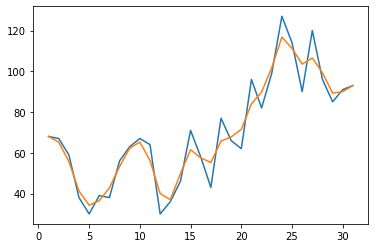

In [29]:
import matplotlib.pyplot as plt
plt.plot(excel_data_df['t'], excel_data_df['yt'])
plt.plot(excel_data_df['t'], excel_data_df['yts'])

In [30]:
t_list=excel_data_df['t'].values.tolist()
yts_list=excel_data_df['yts'].values.tolist()
i=0
t_sum=0
t2_sum=0
yts_sum=0
ytst_sum=0
while i<len(t_list):
  t_sum=t_list[i]+t_sum
  t2_sum=t_list[i]*t_list[i]+t2_sum
  yts_sum=yts_list[i]+yts_sum 
  ytst_sum=yts_list[i]*t_list[i]+ytst_sum
  i=i+1
print("Сумма по t:", t_sum, "| Сумма по t^2:", t2_sum, "| Сумма по yt:", yts_sum, "| Сумма по yt*t:", ytst_sum)

Сумма по t: 496 | Сумма по t^2: 10416 | Сумма по yt: 2171.75 | Сумма по yt*t: 39996.5


In [31]:
import numpy as np
Matrix = np.array([[len(t_list), t_sum], [t_sum, t2_sum]]) 
Vektor = np.array([yts_sum, ytst_sum]) 
result_slau=np.linalg.solve(Matrix, Vektor)
print(result_slau)

[36.19516129  2.11633065]


In [ ]:
#b0 = 36.19516129, b1 = 2.11633065
#функция линейного тренда y = b0 + b1x